# Evaluacion en campañas de marketing en E commerce
SPRINT 8

## INTRODUCCION

### Objetivo:
Optimizar los gastos de marketing de Y.Afisha.

### Descripción de los datos
La tabla visits (registros del servidor con datos sobre las visitas al sitio web):

- Uid: identificador único del usuario;
- Device: dispositivo del usuario;
- Start Ts: fecha y hora de inicio de la sesión;
- End Ts: fecha y hora de término de la sesión;
- Source Id: identificador de la fuente de anuncios de la que proviene el usuario.
- Todas las fechas de esta tabla están en formato AAAA-MM-DD.

La tabla orders (datos sobre pedidos):

- Uid: identificador único del usuario que realiza un pedido;
- Buy Ts: fecha y hora del pedido;
- Revenue: ingresos de Y.Afisha de este pedido.

La tabla costs (datos sobre gastos de marketing):
- source_id: identificador de la fuente de anuncios
- dt: fecha;
- costs: gastos en esta fuente de anuncios en este día.


Se desea investigar:

- cómo los clientes usan el servicio;
- cuándo empiezan a comprar;
- cuánto dinero aporta cada cliente a la compañía;
- cuándo los ingresos cubren el costo de adquisición de los clientes.

## PREPARACION DE  DATOS

### Importacion de librerias

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Visits

In [56]:
visitas = pd.read_csv('/datasets/visits_log_us.csv', dtype={'Device': 'category'}, parse_dates=['Start Ts', 'End Ts']) ##Llamar a archivo de datos y configurarlos datos correctos para columnas
visitas= visitas.rename(columns=  
                        {'Device':'device',
                         'End Ts':'end_ts',
                         'Source Id':'source_id',
                         'Start Ts':'start_ts',
                         'Uid':'uid'}) ##Cambiar nombres de columnas a minusculas
visitas.columns

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

In [57]:
visitas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [58]:
visitas.duplicated().sum()# Revisar si hay duplicados

0

In [59]:
print(visitas.sample(10))

         device              end_ts  source_id            start_ts  \
130203  desktop 2018-03-27 13:53:00          3 2018-03-27 13:53:00   
334484  desktop 2017-11-16 17:37:00          4 2017-11-16 17:33:00   
222962  desktop 2017-11-06 12:22:00          4 2017-11-06 12:21:00   
266193  desktop 2017-06-20 22:08:00          3 2017-06-20 22:06:00   
272859  desktop 2017-12-25 23:41:00          4 2017-12-25 23:38:00   
259875  desktop 2018-05-25 20:55:00          3 2018-05-25 20:36:00   
242811  desktop 2018-03-28 15:18:00          1 2018-03-28 14:55:00   
35460   desktop 2018-05-30 09:11:00          2 2018-05-30 09:11:00   
140397  desktop 2017-12-15 11:14:00          4 2017-12-15 11:10:00   
97414   desktop 2018-01-20 13:45:00          3 2018-01-20 13:17:00   

                         uid  
130203  11401931713303047782  
334484   1258714374513129142  
222962  10644851229228308019  
266193   9402473617722233296  
272859  15799423948503163022  
259875   6102674188193998965  
242811   369

Se mando llamar los datos del df de visitas al sitio cambiando los tipos de datos de las columnas de object a formato datetime y category en las que los datos lo permitian. Ademas se cambio los nombres de las columnas eliminado las letras mayusculas y los espacios. Por ultimo se reviso que no existieran filas duplicadas en el df final.

### Orders

In [60]:
ordenes = pd.read_csv('/datasets/orders_log_us.csv', parse_dates = ['Buy Ts'])

In [61]:
ordenes.info()# Imprimir informacion del df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [62]:
ordenes= ordenes.rename(columns={
                        'Buy Ts':'buy_ts',
                        'Revenue':'revenue',
                        'Uid':'uid'})  ##Cambiar nombres de columnas a minusculas

print(ordenes.sample(10))

                   buy_ts  revenue                   uid
15169 2017-10-29 14:08:00     1.83  12176000976206968963
46932 2018-05-11 08:42:00     2.44  10967370952009696539
1150  2017-06-09 14:55:00     3.48   7037066229248304548
13506 2017-10-19 01:04:00     3.67    761464556734035665
39956 2018-03-15 13:04:00     3.30  15253354780141134937
7079  2017-09-07 11:56:00     0.24  10690821320684576586
18236 2017-11-18 12:56:00     1.83  16675652165943945197
30495 2018-01-22 15:53:00     0.71  17276158971903134959
37931 2018-03-03 11:43:00     0.61   2347211961687836700
42031 2018-03-26 13:16:00     1.10   6980592975159463782


In [63]:
ordenes.duplicated().sum()

0

Se mando llamar el archivo con informacion de las pedidos, se modifico el tipo de datos de la columna buy_ts de object a datetime y se cambio el nombre de las columnas para eliminar mayusculas y espacios. Ademas se comprobo que no existieran columnas duplicadas.

### Costs

In [64]:
marketing = pd.read_csv('/datasets/costs_us.csv', parse_dates= ['dt'])

In [65]:
marketing.info()# Imprimir informacion del df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [66]:
marketing.duplicated().sum()# Revisar si hay duplicados

0

In [67]:
print(marketing.sample(10))

      source_id         dt   costs
102           1 2017-09-11   48.02
867           3 2017-10-20  516.12
126           1 2017-10-05   85.21
590           2 2018-01-14   98.85
1763          5 2018-04-09  122.59
271           1 2018-02-27   89.24
393           2 2017-07-01   61.77
1917          9 2017-09-10   12.70
2112          9 2018-03-24   13.42
585           2 2018-01-09  184.67


Se mando llamar el archivo con informacion de los costos,los tipos de datos estaba correctos y los nombres de las columnas tambien, se comprobo que no existieran columnas duplicadas.

## CALCULO DE METRICOS

### Visitas

In [68]:
#'device', 'end_ts', 'source_id', 'start_ts', 'uid'
first_visit = visitas.groupby('uid')['start_ts'].min() #Extraer fecha de primer inicio de sesion para armar cohortes
first_visit.name = 'first_ts'  #cambiar nombre para que no se repita en el df al unirlo

visitas = visitas.merge(first_visit, on='uid')# combinar series de primer inicio de sesion con df
visitas['first_ts_month'] = visitas['first_ts'].astype('datetime64[M]')

visitas['duration_session'] = (visitas['end_ts'] - visitas['start_ts']).dt.seconds #Calcular duracion de sesion para cada caso
visitas['visit_year'] = visitas['start_ts'].dt.year  #Extraer año de sesion
visitas['visit_month'] = visitas['start_ts'].astype('datetime64[M]') #Extraer mes de sesion
visitas['visit_week'] = visitas['start_ts'].dt.week #Extraer semana de sesion
visitas['visit_date'] = visitas['start_ts'].dt.date #Extraer fecha de sesion


In [69]:
 #Calcular tiempo de vida de la cohorte e impprimirlo en meses
visitas['cohort_lifetime'] = (visitas['visit_month'] - visitas['first_ts_month'])/np.timedelta64(1,'M') #Calcular tiempo de vida de la cohorte
visitas['cohort_lifetime'] =visitas['cohort_lifetime'].round().astype('int')
print(visitas.columns)

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid', 'first_ts',
       'first_ts_month', 'duration_session', 'visit_year', 'visit_month',
       'visit_week', 'visit_date', 'cohort_lifetime'],
      dtype='object')


In [70]:
#Agregar columna con numero de usuarios de cada cohorte
visitas_0=visitas[visitas['cohort_lifetime']== 0 ]
cohort_users = visitas_0.groupby('first_ts_month')['uid'].nunique()
cohort_users.name= 'cohort_users'
cohort_users = cohort_users.reset_index()
visitas = visitas.merge(cohort_users, on='first_ts_month' )
print(visitas.head())

    device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   
2    touch 2017-12-26 17:35:00          4 2017-12-26 17:30:00   
3  desktop 2018-01-08 18:55:00          2 2018-01-08 18:46:00   
4  desktop 2018-01-07 13:13:00          4 2018-01-07 12:58:00   

                    uid            first_ts first_ts_month  duration_session  \
0  16879256277535980062 2017-12-20 17:20:00     2017-12-01              1080   
1   9969694820036681168 2017-12-27 14:06:00     2017-12-01                 0   
2  11451610027598174149 2017-12-26 17:30:00     2017-12-01               300   
3  11451610027598174149 2017-12-26 17:30:00     2017-12-01               540   
4  11451610027598174149 2017-12-26 17:30:00     2017-12-01               900   

   visit_year visit_month  visit_week  visit_date  cohort_lifetime  \
0        2017  2017-12-01          51  2017-12-20         

In [71]:
#¿Cuántas personas lo usan cada día, semana y mes?
#Calcular MAU,DAU y WAU del df
mau_total = (
   visitas.groupby(['visit_year', 'visit_month'])
   .agg({'uid': 'nunique'})
   .mean())
    
wau_total = (
   visitas.groupby(['visit_year', 'visit_week'])
   .agg({'uid': 'nunique'})
   .mean())
    
dau_total = (
   visitas.groupby('visit_date')
   .agg({'uid': 'nunique'})
   .mean())
    
print('mau =', int(mau_total))
print('wau =', int(wau_total))
print('dau =', float(dau_total))

mau = 23228
wau = 5716
dau = 907.9917582417582


In [72]:
#¿Cuántas sesiones hay por día? (Un/a usuario/a puede tener más de una sesión).

session_day =  visitas.groupby('visit_date')['uid'].count().mean()

print('El promedio de sesiones por dia es:',float(session_day))

El promedio de sesiones por dia es: 987.3626373626373


Podemos observar que el promedio de sesiones diarias es mayor que el DAU, esto debe ser porque hay un pequeño numero de usuarios que tiene mas de una sesion por dia

In [73]:
#¿Cuál es la duración de cada sesión?

session_duration =  visitas['duration_session'].mean()

print(f'El promedio de duracion de la sesion es: {float(session_duration)} segundos')

El promedio de duracion de la sesion es: 643.506488592098 segundos


In [74]:
#¿Con qué frecuencia los usuarios y las usuarias regresan?
#Calcular facortes sticky WAU y sticky MAU e impprimirlos
sticky_wau= (dau_total / wau_total)*100 
sticky_mau = (dau_total / mau_total) *100

print(f'El factor de adherencia semanal es: {int(sticky_wau.round())}%')
print(f'El factor de adherencia mensual es: {int(sticky_mau.round())}%')

El factor de adherencia semanal es: 16%
El factor de adherencia mensual es: 4%


El factor de adherencia Mensual es una cuarta parte del semanal, la retencion entre la semana y el mes es baja.

In [75]:
#¿Con qué frecuencia los usuarios y las usuarias regresan?

# Agrupar el df por cohort_lifetime para ver el mov de usuarios con el tiempo
visitas_cohortes = visitas.groupby(['first_ts_month','cohort_lifetime']).agg({'uid':'count'})
visitas_cohortes = visitas_cohortes.reset_index()
print(visitas_cohortes.head())

  first_ts_month  cohort_lifetime    uid
0     2017-06-01                0  16505
1     2017-06-01                1   2412
2     2017-06-01                2   1758
3     2017-06-01                3   2260
4     2017-06-01                4   2679


In [76]:
#¿Con qué frecuencia los usuarios y las usuarias regresan?
visitas_pivot = visitas_cohortes.pivot_table(
    index='first_ts_month',
    columns='cohort_lifetime',
    values='uid',
)

<AxesSubplot:title={'center':'Sesiones por mes por cohorte'}, xlabel='cohort_lifetime', ylabel='first_ts_month'>

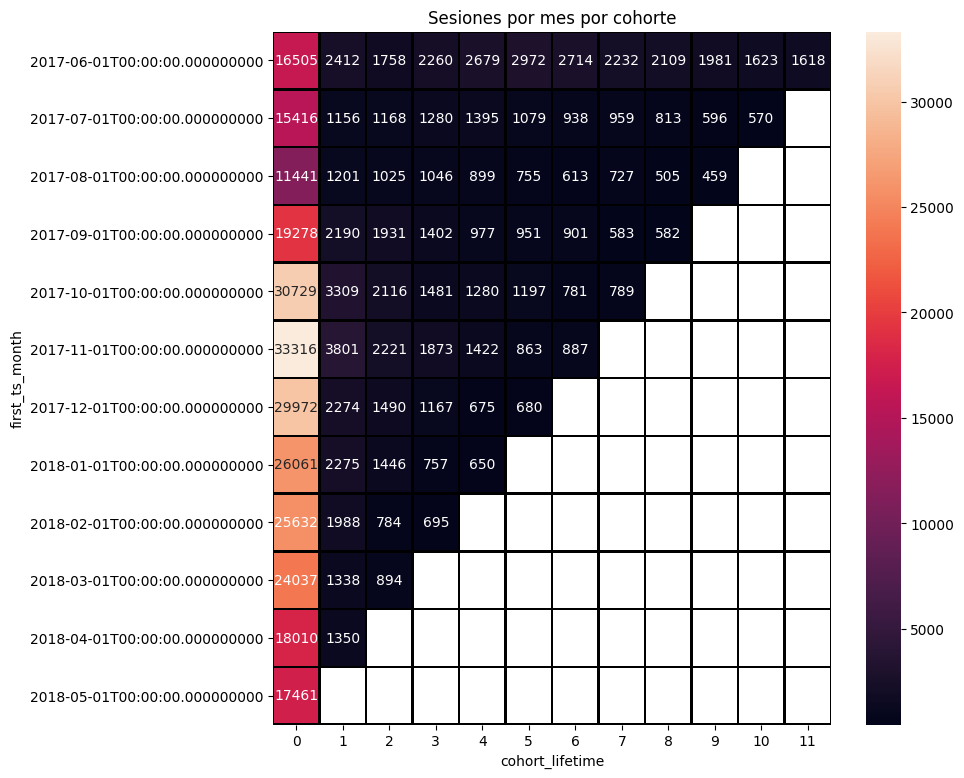

In [77]:
plt.figure(figsize=(9,9))
plt.title('Sesiones por mes por cohorte')
sns.heatmap(
    visitas_pivot,
    annot = True,
    fmt = '.0f',
    linewidths = 1,
    linecolor = 'black'
)

Podemos observar que el primer mes de cada cohorte la entrada de usuarios es muy grande, pero para el segundo mes  de la misma cohorte bajan mucho las visitas de los usuarios, por lo que podemos ver que la retencion de usuarios es muy poca, aunque la retencion de la primer cohorte baja lentamente, la de las demas cohortes tambien baja mes con mes en mayor grado.

### Ventas

In [78]:
ordenes['buy_ts_date'] = ordenes['buy_ts'].dt.date #Agregar una columna con el mes de cada compra
#print(ordenes.sample)

#Agrupar datos para obtener las ganancias mensuales por usuario y la cantidad de compras que hizo
ordenes_1 = ordenes.groupby(['uid','buy_ts_date']).agg({'revenue':['sum','count']})

ordenes_1=ordenes_1.reset_index()
ordenes_1.columns = [ 'uid', 'buy_ts_date', 'revenue_sum','revenue_count']
print(ordenes_1.head())

                uid buy_ts_date  revenue_sum  revenue_count
0   313578113262317  2018-01-03         0.55              1
1  1575281904278712  2017-06-03         3.05              2
2  2429014661409475  2017-10-11        73.33              1
3  2464366381792757  2018-01-28         2.44              1
4  2551852515556206  2017-11-24        10.99              2


In [79]:
#Combinar este dataframe con el de visitas para poder hacer un analisis completo
ordenes_visitas = visitas.merge(ordenes_1, left_on=['uid','visit_date'], right_on= ['uid','buy_ts_date'], how = 'left')
ordenes_visitas['buy_ts_date']=ordenes_visitas['buy_ts_date'].astype('datetime64')
ordenes_visitas['buy_ts_month'] = ordenes_visitas['buy_ts_date'].astype('datetime64[M]')#Agregar mes de cada compra
ordenes_visitas['visit_date']=ordenes_visitas['visit_date'].astype('datetime64')
print(ordenes_visitas.head())

    device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   
2    touch 2017-12-26 17:35:00          4 2017-12-26 17:30:00   
3  desktop 2018-01-08 18:55:00          2 2018-01-08 18:46:00   
4  desktop 2018-01-07 13:13:00          4 2018-01-07 12:58:00   

                    uid            first_ts first_ts_month  duration_session  \
0  16879256277535980062 2017-12-20 17:20:00     2017-12-01              1080   
1   9969694820036681168 2017-12-27 14:06:00     2017-12-01                 0   
2  11451610027598174149 2017-12-26 17:30:00     2017-12-01               300   
3  11451610027598174149 2017-12-26 17:30:00     2017-12-01               540   
4  11451610027598174149 2017-12-26 17:30:00     2017-12-01               900   

   visit_year visit_month  visit_week visit_date  cohort_lifetime  \
0        2017  2017-12-01          51 2017-12-20           

In [80]:
ordenes_visitas['buyer?']=(~ordenes_visitas['revenue_sum'].isna())#Agregar columna que diga si el usuario de esta fila hizo una compra en esa fecha para analisis posterior
print(ordenes_visitas['buyer?'].head())

0    False
1    False
2    False
3    False
4    False
Name: buyer?, dtype: bool


In [81]:
##Cual es el periodo de conversion promedio de los ususarios?

##Tiempo en que los usuarios hicieron su primer pedido despues de su primera visita
ordenes_visits = ordenes.groupby('uid').agg({'buy_ts':'min'})# Obtener la fecha de la primera compra por cada usuario
ordenes_visits= ordenes_visits.reset_index()
print(ordenes_visits.head())


visit_ordenes = visitas.groupby(['uid','first_ts'])['start_ts'].count()#Agrupar df para obtener los primeros inicios de sesion por usuario
visit_ordenes= visit_ordenes.reset_index()
print(visit_ordenes.head())

                uid              buy_ts
0   313578113262317 2018-01-03 21:51:00
1  1575281904278712 2017-06-03 10:13:00
2  2429014661409475 2017-10-11 18:33:00
3  2464366381792757 2018-01-28 15:54:00
4  2551852515556206 2017-11-24 10:14:00
               uid            first_ts  start_ts
0   11863502262781 2018-03-01 17:27:00         1
1   49537067089222 2018-02-06 15:55:00         1
2  297729379853735 2017-06-07 18:47:00         1
3  313578113262317 2017-09-18 22:49:00         3
4  325320750514679 2017-09-30 14:29:00         2


In [82]:
conversion_time = visit_ordenes.merge(ordenes_visits, on='uid')#combinar las dos tablas anteriores
print(conversion_time.head())

                uid            first_ts  start_ts              buy_ts
0   313578113262317 2017-09-18 22:49:00         3 2018-01-03 21:51:00
1  1575281904278712 2017-06-03 10:13:00         2 2017-06-03 10:13:00
2  2429014661409475 2017-10-11 17:14:00         1 2017-10-11 18:33:00
3  2464366381792757 2018-01-27 20:10:00         2 2018-01-28 15:54:00
4  2551852515556206 2017-11-24 10:14:00         2 2017-11-24 10:14:00


In [83]:
#crear columna con el delta entre la primer fecha de inicio de sesion y la primer fecha de compra
conversion_time['conversion_time'] = (conversion_time['buy_ts'] - conversion_time['first_ts'])/np.timedelta64(1, 'D')
conversion_time['conversion_time'] = (conversion_time['conversion_time'].round().astype('int')) #cambiar a tipo de dato correcto

conversion_time['first_ts_month'] = conversion_time['first_ts'].astype('datetime64[M]')#cambiar a tipo de dato correcto
conversion_time['buy_ts_month'] = conversion_time['buy_ts'].astype('datetime64[M]')  #cambiar a tipo de dato correcto
conversion_time['cohort_lifetime'] = (conversion_time['buy_ts_month'] - conversion_time['first_ts_month'])/np.timedelta64(1, 'M')  #Crear columna de ciclo de vida
conversion_time['cohort_lifetime'] = conversion_time['cohort_lifetime'].round().astype('int') #cambiar a tipo de dato correcto


print(conversion_time.sample(10))

                        uid            first_ts  start_ts              buy_ts  \
5168    2619681179583143396 2018-04-15 16:01:00         1 2018-04-15 16:04:00   
16543   8303493463856749321 2017-09-20 21:49:00         3 2018-01-29 16:05:00   
12771   6379815315172380393 2017-11-19 22:17:00         1 2017-12-16 14:42:00   
24788  12523792242157429441 2017-11-27 16:39:00         6 2018-02-20 22:17:00   
25931  13097738541934812391 2017-09-21 07:08:00         2 2017-09-21 07:08:00   
22665  11453094428880239743 2017-09-11 13:58:00         3 2017-11-15 12:15:00   
19908  10063131502932180214 2017-10-21 12:49:00         2 2017-10-21 22:05:00   
9652    4881531697224946957 2017-11-16 11:16:00         1 2017-11-16 11:27:00   
29995  15116039834912425560 2017-11-04 13:35:00         1 2017-11-04 13:39:00   
5514    2793222927092149879 2017-11-01 14:41:00         4 2017-11-01 15:13:00   

       conversion_time first_ts_month buy_ts_month  cohort_lifetime  
5168                 0     2018-04-01 

In [84]:
#Agrupar df para obtener la media de tiempo de conversion por cada cohorte
conversion_time_lifetime = conversion_time.groupby(['first_ts_month','cohort_lifetime']).agg({'conversion_time':'mean'})
conversion_time_lifetime = conversion_time_lifetime.reset_index()
#print(conversion_time_lifetime.sample(10))
#Sacar la media de tiempo de conversion por cohorte
conversion_time_lifetime_mean = conversion_time_lifetime.groupby('first_ts_month')['conversion_time'].mean()
print('La media de tiempo de conversion (Dias) para cada cohorte se muestra en la siguiente tabla:')
print(conversion_time_lifetime_mean)

La media de tiempo de conversion (Dias) para cada cohorte se muestra en la siguiente tabla:
first_ts_month
2017-06-01    169.545415
2017-07-01    153.547954
2017-08-01    136.172155
2017-09-01    120.284456
2017-10-01    105.250478
2017-11-01     88.921911
2017-12-01     75.858676
2018-01-01     57.068872
2018-02-01     44.604761
2018-03-01     30.140789
2018-04-01     12.157992
2018-05-01      0.304536
Name: conversion_time, dtype: float64


En la tabla de arriba se muestra el promedio de dias en los que los usuarios hacen su primer pedido,  segun los dato en algunas cohortes los clientes tardan mas de 10 dias en hacer su primer pedido, esto lo comprobaremos revisando la cantidad de usuarios que hacen su primer pedido en cada mes de vida de su cohorte a mas adelante.

In [85]:
#Hacer tabla pivote para los tiempos de conversion promedio por cohorte
conversion_pivot_cohort = conversion_time_lifetime.pivot_table(
    index='first_ts_month',
    columns='cohort_lifetime',
    values='conversion_time',
    )

<AxesSubplot:title={'center':'Tiempo promedio de conversion por cohorte(dias)'}, xlabel='cohort_lifetime', ylabel='first_ts_month'>

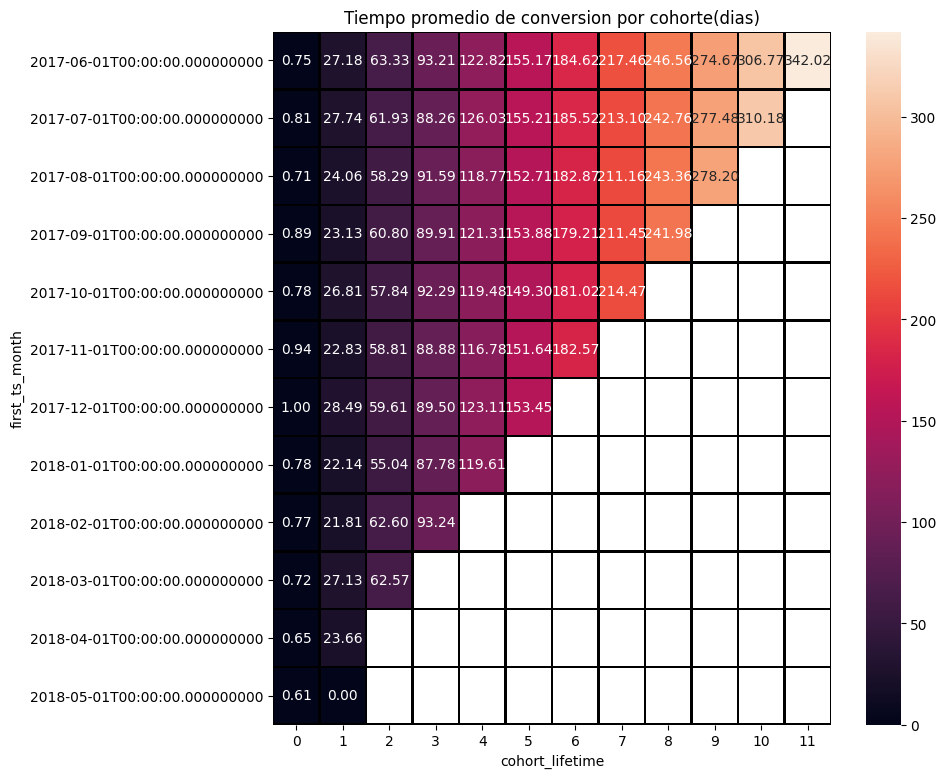

In [86]:
plt.figure(figsize=(9,9))
plt.title('Tiempo promedio de conversion por cohorte(dias)')
sns.heatmap(
    conversion_pivot_cohort,
    annot = True,
    fmt = '.2f',
    linewidths = 1,
    linecolor = 'black'
)

Es claro que como los datos son muy variantes en los dias de compras de los usuarios el promedio podria ser un poco engañoso, verificaremos en que mes de vida la mayoria de los usuarios hacen las compras.

In [87]:
#Hacer analisis de cuantos usuarios realizaron sus primeras compras en cada mes del ciclo de vida
orders_per_lifetime = conversion_time.groupby(['first_ts_month','cohort_lifetime'])['buy_ts'].count()
orders_per_lifetime=orders_per_lifetime.reset_index()
orders_per_lifetime['buy_ts']= orders_per_lifetime['buy_ts'].astype('int')

#Tabla pivote con #num de compradores por cada mes de ciclo de vida(primeras compras)
orders_per_lifetime_p = orders_per_lifetime.pivot_table(
    index='first_ts_month',
    columns='cohort_lifetime',
    values='buy_ts',
    )

<AxesSubplot:title={'center':'Primeras compras por usuario'}, xlabel='cohort_lifetime', ylabel='first_ts_month'>

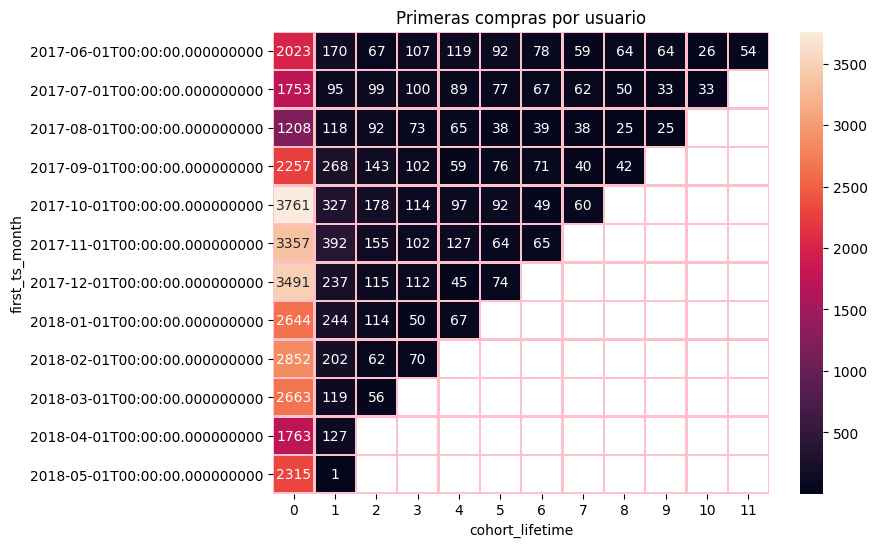

In [88]:
plt.figure(figsize=(8,6))
plt.title('Primeras compras por usuario')
sns.heatmap(
    orders_per_lifetime_p,
    annot = True,
    fmt = '.0f',
    linewidths = 1,
    linecolor = 'Pink')

Podemos comprobar como era de esperarse que la mayor cantidad de compras se hacen en el primer mes de registro de los usuarios, por lo que podemos considerar el tiempo de conversion del mes 0 del ciclo de vida como el tiempo promedio en que se hace la primera compra.

In [89]:
#Cuantos pedidos se hacen por un periodo de tiempo dado

#print(ordenes_visitas.head())

<AxesSubplot:title={'center':'Compras de cada cohorte en su ciclo de vida'}, xlabel='cohort_lifetime', ylabel='first_ts_month'>

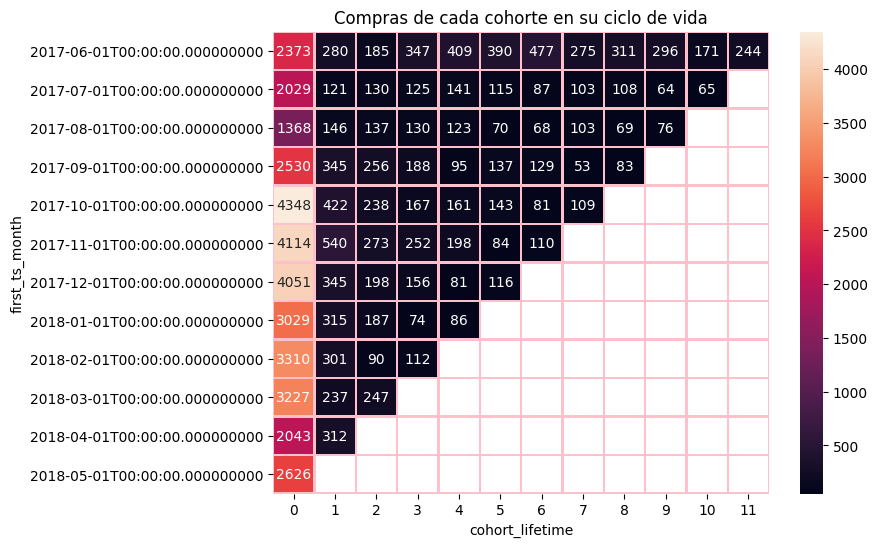

In [90]:
#Cuantos pedidos se hacen por un periodo de tiempo dado

#Cantidad de pedidos de los usuarios segun su cohorte y su año de vida
ordenes_visitas_1 = ordenes_visitas.groupby(['first_ts_month','cohort_lifetime']).agg({'revenue_count':'count'})

ordenes_visitas_ped = ordenes_visitas_1.pivot_table(
    index='first_ts_month',
    columns='cohort_lifetime',
    values='revenue_count',
    )

plt.figure(figsize=(8,6))
plt.title('Compras de cada cohorte en su ciclo de vida')
sns.heatmap(
    ordenes_visitas_ped,
    annot = True,
    fmt = '.0f',
    linewidths = 1,
    linecolor = 'Pink')

Podemos observar en el heatmap como ya habiamos visto la mayor cantidad de compras se da en el primer mes de los usuarios, despues de eso bajan las ventas de esa cohorte hasta un 90% y de ahi en adelante casi en todos los casos van descendiendo poco a poco. Se puede decir que los usuarios si vuelven pero cada vez menos.

15.330226952798165


<AxesSubplot:title={'center':'Porcentaje de compradores por cohorte por ciclo de vida'}, xlabel='cohort_lifetime', ylabel='first_ts_month'>

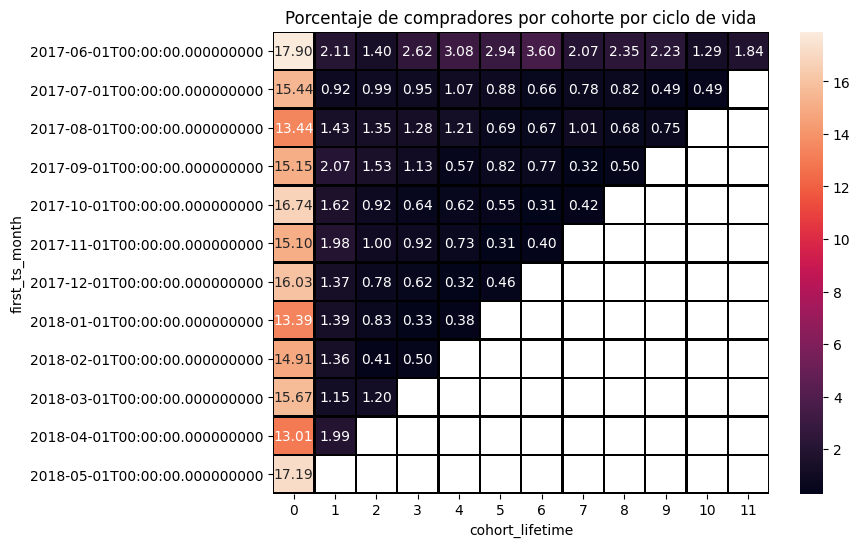

In [91]:
#Porcentaje de usuarios compradores por cohorte por ciclo de vida

promedio_compradores = ordenes_visitas.groupby(['first_ts_month','cohort_lifetime','cohort_users']).agg({'revenue_count':'count'})
promedio_compradores=promedio_compradores.reset_index()
promedio_compradores['promedio_de_compradores']= (promedio_compradores['revenue_count']/promedio_compradores['cohort_users'])*100

print(promedio_compradores[promedio_compradores['cohort_lifetime']==0]['promedio_de_compradores'].mean())
promedio_compradores_p = promedio_compradores.pivot_table(
    index='first_ts_month',
    columns='cohort_lifetime',
    values='promedio_de_compradores',
    )

plt.figure(figsize=(8,6))
plt.title('Porcentaje de compradores por cohorte por ciclo de vida')
sns.heatmap(
    promedio_compradores_p,
    annot = True,
    fmt = '.2f',
    linewidths = 1,
    linecolor = 'Black')

En la tabla de arriba se muestra el pocentaje de usuarios que realizan una compra del total de usuarios que conforman esa cohorte, la cohorte del 6/2017 a mantenido un porcentaje mantenido arriba del 1%, habra que investigar que se ha hecho bien con ellos para que continuen comprando con la empresea alo largo del tiempo.

              revenue_sum
buy_ts_month             
2017-06-01       11838.34
2017-07-01       14168.99
2017-08-01        9730.12
2017-09-01       23542.01
2017-10-01       31711.09
2017-11-01       32094.73
2017-12-01       43158.25
2018-01-01       21285.01
2018-02-01       26361.74
2018-03-01       32436.04
2018-04-01       18341.91
2018-05-01       23367.12


<AxesSubplot:title={'center':'Venta total por mes'}, xlabel='Mes', ylabel='Venta $'>

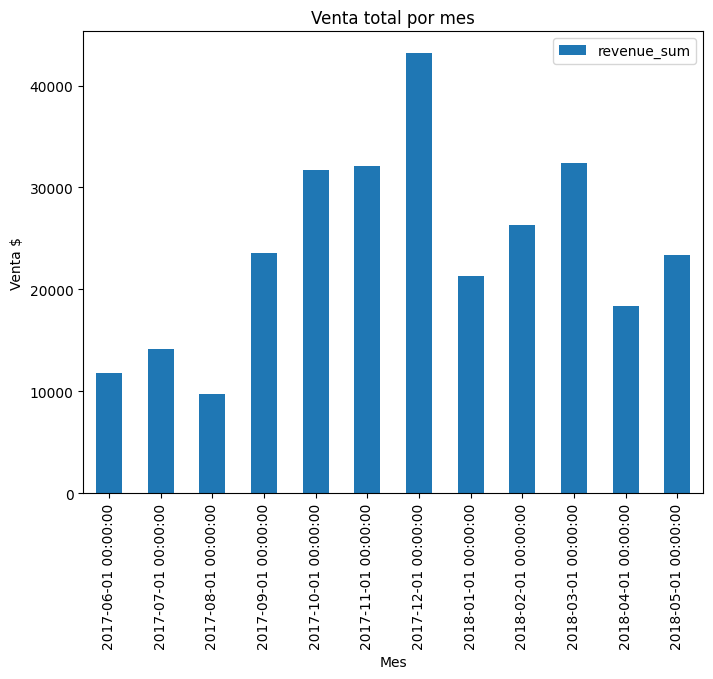

In [92]:
#Venta mensual en $
ganancias_por_mes = ordenes_visitas.groupby('buy_ts_month').agg({'revenue_sum':'sum'})
print(ganancias_por_mes)
ganancias_por_mes.plot(kind='bar',xlabel='Mes', ylabel= 'Venta $' , y='revenue_sum', title='Venta total por mes',figsize = (8,6))


   buy_ts_month  revenue_count
0    2017-06-01         2686.0
1    2017-07-01         2597.0
2    2017-08-01         1929.0
3    2017-09-01         3645.0
4    2017-10-01         6099.0
5    2017-11-01         6398.0
6    2017-12-01         6682.0
7    2018-01-01         4941.0
8    2018-02-01         5743.0
9    2018-03-01         5869.0
10   2018-04-01         3412.0
11   2018-05-01         5027.0


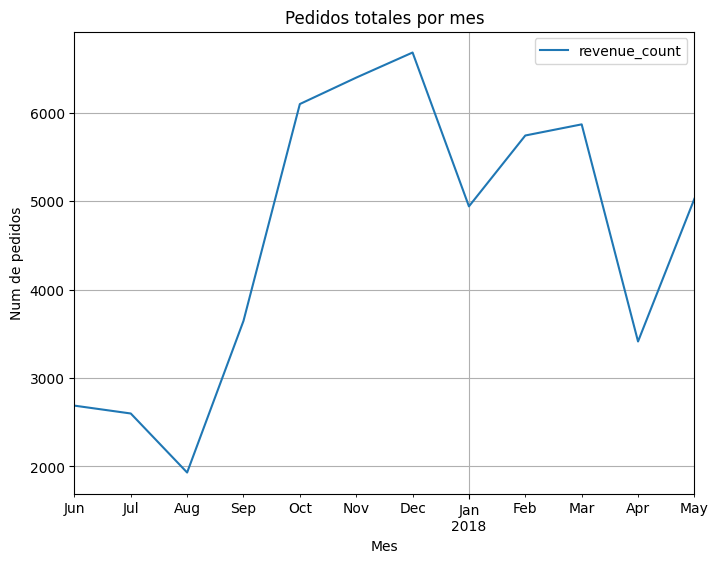

In [93]:
#Venta mensual en cantidad de pedidos
pedidos_por_mes = ordenes_visitas.groupby('buy_ts_month').agg({'revenue_count':'sum'})
pedidos_por_mes = pedidos_por_mes.reset_index()
print(pedidos_por_mes)
pedidos_por_mes.plot(kind='line' ,x='buy_ts_month', y='revenue_count', xlabel='Mes', ylabel='Num de pedidos', title='Pedidos totales por mes', figsize = (8,6),grid=True)
plt.show()

Las ventas aumentaron de septiembre 2017 a diciembre del mismo año y de ahi de nuevo en marzo, pero a partir que aumentaron en septiembre del 2017 se han mantenido por encima d elas ventas de los primeros 3 meses.

In [94]:
#Tamano promedio de la compra
ordenes_visitas['compra_promedio'] = ordenes_visitas['revenue_sum']/ ordenes_visitas['revenue_count']
compra_promedio = ordenes_visitas['compra_promedio'].mean()

print(f'La compra promedio es de ${compra_promedio}')

La compra promedio es de $4.859857347075305


<AxesSubplot:title={'center':'LTV de compradores por cohorte por ciclo de vida'}, xlabel='cohort_lifetime', ylabel='first_ts_month'>

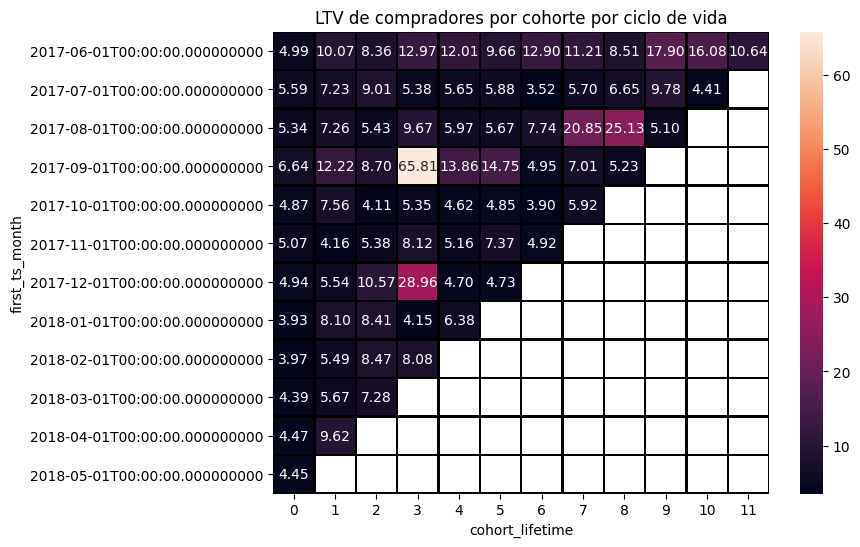

In [95]:
#LTV de usuarios compradores por cohorte por ciclo de vida
ltv_de_compradores = ordenes_visitas.groupby(['first_ts_month','cohort_users','cohort_lifetime']).agg({'revenue_sum':'sum','buyer?':'sum'})#Agrupar df para obtener un df con las ventas y compradores totales
ltv_de_compradores=ltv_de_compradores.reset_index()
ltv_de_compradores['ltv_de_compradores']= ltv_de_compradores['revenue_sum']/ltv_de_compradores['buyer?']#Crear columna en el df con ltv por mes por cohorte
#imprimir pivote con ltv por cohorte por mes de ciclo de vida
ltv_de_compradores_p = ltv_de_compradores.pivot_table(
    index='first_ts_month',
    columns='cohort_lifetime',
    values='ltv_de_compradores',
    aggfunc='mean'
    )

plt.figure(figsize=(8,6))
plt.title('LTV de compradores por cohorte por ciclo de vida')
sns.heatmap(
    ltv_de_compradores_p,
    annot = True,
    fmt = '.2f',
    linewidths = 1,
    linecolor = 'Black')

Observamos en la tabla de arriba que el LTV de los usuarios es variante a traves de su tiempo de vida, al parecer el promedio de 4 es lo normal pero a llegado a ser en algunos casos hasta de 65.

In [96]:
ltv_mean = ltv_de_compradores_p.cumsum(axis=1).mean(axis=0)
print(f'El LTV acumulado promedio por mes de vida es: {ltv_mean}')

El LTV acumulado promedio por mes de vida es: cohort_lifetime
0       4.887712
1      12.466854
2      19.877936
3      36.659257
4      45.281686
5      54.884777
6      60.448808
7      74.640065
8      94.386217
9      90.383756
10     96.741767
11    135.313644
dtype: float64


Arriba se muestra el LTV acumulado promedio por usuario a lo largo de su ciclo de vida, a los 11 meses se ha obtenido una ganancia de 135 dll promedio por usuario.

### Marketing

In [97]:
print(ordenes_visitas.columns)
print()
#print(marketing.head())
#ordenes_visitas.info()
marketing['month'] = marketing['dt'].astype('datetime64[M]')
print()
print(marketing['month'].unique())

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid', 'first_ts',
       'first_ts_month', 'duration_session', 'visit_year', 'visit_month',
       'visit_week', 'visit_date', 'cohort_lifetime', 'cohort_users',
       'buy_ts_date', 'revenue_sum', 'revenue_count', 'buy_ts_month', 'buyer?',
       'compra_promedio'],
      dtype='object')


['2017-06-01T00:00:00.000000000' '2017-07-01T00:00:00.000000000'
 '2017-08-01T00:00:00.000000000' '2017-09-01T00:00:00.000000000'
 '2017-10-01T00:00:00.000000000' '2017-11-01T00:00:00.000000000'
 '2017-12-01T00:00:00.000000000' '2018-01-01T00:00:00.000000000'
 '2018-02-01T00:00:00.000000000' '2018-03-01T00:00:00.000000000'
 '2018-04-01T00:00:00.000000000' '2018-05-01T00:00:00.000000000']


In [98]:
#Agrupar df para obtener el total de cosotos por mes por source_id
marketing_1 = marketing.groupby(['source_id','month'])['costs'].sum()
marketing_1=marketing_1.reset_index()
#print(marketing_1.head(20))

#Combinar df agrupado anteriormente con df con el df que tenemos con la informacion gral de las otras dos tablas(visitas y ordenes)
ordenes_visitas['visit_month']=ordenes_visitas['visit_month'].astype('datetime64[M]')
ord_vis_mkt = ordenes_visitas.merge(marketing_1, left_on= ['source_id','visit_month'], right_on = ['source_id','month'])
print(ord_vis_mkt.head()) 

    device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1    touch 2017-12-26 17:35:00          4 2017-12-26 17:30:00   
2  desktop 2017-12-28 15:46:00          4 2017-12-28 15:24:00   
3  desktop 2017-12-18 14:08:00          4 2017-12-18 14:04:00   
4  desktop 2017-12-02 21:26:00          4 2017-12-02 20:54:00   

                    uid            first_ts first_ts_month  duration_session  \
0  16879256277535980062 2017-12-20 17:20:00     2017-12-01              1080   
1  11451610027598174149 2017-12-26 17:30:00     2017-12-01               300   
2     63137637277926835 2017-12-28 15:24:00     2017-12-01              1320   
3  14259519155654778234 2017-12-13 10:50:00     2017-12-01               240   
4  10867105098799512759 2017-12-02 20:54:00     2017-12-01              1920   

   visit_year visit_month  ...  cohort_lifetime cohort_users  buy_ts_date  \
0        2017  2017-12-01  ...                0    

In [99]:
#¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)
total_cost = marketing['costs'].sum()
print(f'El total invertido en gastos de marketing para todo el periodo analizado fue de {total_cost}')

El total invertido en gastos de marketing para todo el periodo analizado fue de 329131.62


In [100]:
#¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)
#Hacer tabla pivote con los gastos separador por mes y por source_id
pivot_cost_month = marketing_1.pivot_table(
    index='month',
    columns='source_id',
    values='costs',)


print('Los gastos por source_id de cada mes se presentan en la siguiente tabla')
print(pivot_cost_month)


Los gastos por source_id de cada mes se presentan en la siguiente tabla
source_id        1        2         3        4        5       9       10
month                                                                   
2017-06-01  1125.61  2427.38   7731.65  3514.80  2616.12  285.22  314.22
2017-07-01  1072.88  2333.11   7674.37  3529.73  2998.14  302.54  329.82
2017-08-01   951.81  1811.05   6143.54  3217.36  2185.28  248.93  232.57
2017-09-01  1502.01  2985.66   9963.55  5192.26  3849.14  415.62  460.67
2017-10-01  2315.75  4845.00  15737.24  6420.84  5767.40  609.41  627.24
2017-11-01  2445.16  5247.68  17025.34  5388.82  6325.34  683.18  792.36
2017-12-01  2341.20  4897.80  16219.52  7680.47  5872.52  657.98  645.86
2018-01-01  2186.18  4157.74  14808.78  5832.79  5371.52  547.16  614.35
2018-02-01  2204.48  4474.34  14228.56  5711.96  5071.31  551.50  480.88
2018-03-01  1893.09  3943.14  13080.85  5961.87  4529.62  480.29  526.41
2018-04-01  1327.49  2993.70   9296.81  4408.49  350

En la tabla de arriba se muestran los gastos por fuente de anuncios por mes. Vemos que las mas costosas son la 3,4 y 5.

In [101]:
#¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)
print(marketing_1.groupby('month')['costs'].sum())#Costos totales por mes
print()
print(marketing_1.groupby('source_id')['costs'].sum())#Costos totales por souce_id

month
2017-06-01    18015.00
2017-07-01    18240.59
2017-08-01    14790.54
2017-09-01    24368.91
2017-10-01    36322.88
2017-11-01    37907.88
2017-12-01    38315.35
2018-01-01    33518.52
2018-02-01    32723.03
2018-03-01    30415.27
2018-04-01    22289.38
2018-05-01    22224.27
Name: costs, dtype: float64

source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64


In [102]:
#¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes? 
#Agrupar df que tenemos para separar las columnas que necesitamos para el analisis
cost_per_usr= ord_vis_mkt.groupby(['visit_month','source_id','costs','first_ts_month','cohort_lifetime']).agg({'uid':'nunique','revenue_sum':'sum','revenue_count':'sum','buyer?':'sum','start_ts':'count'})
cost_per_usr= cost_per_usr.reset_index()
#print(cost_per_usr.head())

In [103]:
#calcular costo por usuario,por comprador(CAC),ganancias por usuario, por comprador(LTV),Porcentaje de usuarios que son compradores y el romi

cost_per_usr['cost_per_usr'] = cost_per_usr['costs']/cost_per_usr['uid']
cost_per_usr['cost_per_buyer(CAC)'] = cost_per_usr['costs']/cost_per_usr['buyer?']
cost_per_usr['rev_per_usr'] = cost_per_usr['revenue_sum']/cost_per_usr['uid']
cost_per_usr['rev_per_buyer(LTV)'] = cost_per_usr['revenue_sum']/cost_per_usr['buyer?']
cost_per_usr['users/buyers(%)'] = (cost_per_usr['buyer?']/cost_per_usr['uid'])*100
cost_per_usr['romi'] = cost_per_usr['rev_per_buyer(LTV)'] / cost_per_usr['cost_per_buyer(CAC)']
print(cost_per_usr.head())

  visit_month  source_id    costs first_ts_month  cohort_lifetime   uid  \
0  2017-06-01          1  1125.61     2017-06-01                0   972   
1  2017-06-01          2  2427.38     2017-06-01                0  1532   
2  2017-06-01          3  7731.65     2017-06-01                0  4226   
3  2017-06-01          4  3514.80     2017-06-01                0  3636   
4  2017-06-01          5  2616.12     2017-06-01                0  2903   

   revenue_sum  revenue_count  buyer?  start_ts  cost_per_usr  \
0      2294.58          431.0     353      1544      1.158035   
1      2403.05          373.0     315      2191      1.584452   
2      2536.34          676.0     637      4435      1.829543   
3      1863.02          469.0     434      3911      0.966667   
4      2322.62          562.0     476      3122      0.901178   

   cost_per_buyer(CAC)  rev_per_usr  rev_per_buyer(LTV)  users/buyers(%)  \
0             3.188697     2.360679            6.500227        36.316872   
1     

<AxesSubplot:title={'center':'CAC por mes por source_id'}, xlabel='source_id', ylabel='visit_month'>

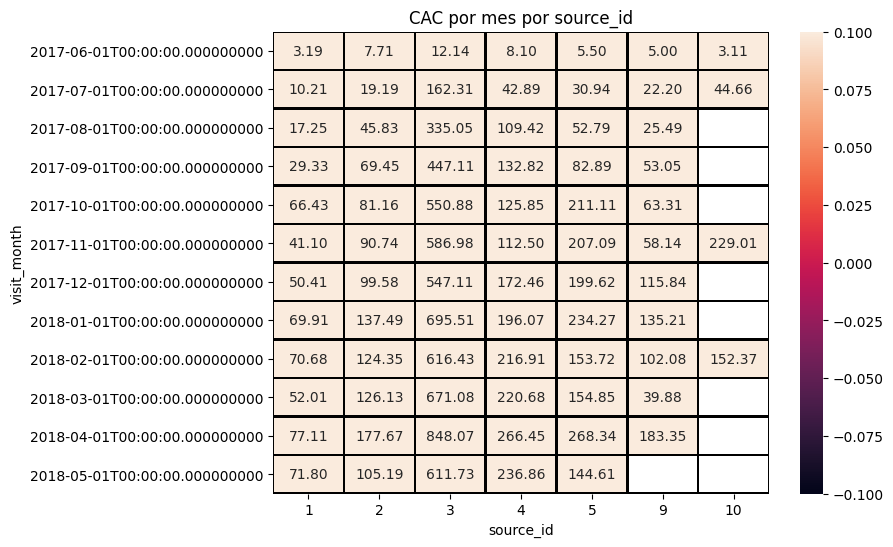

In [104]:
#¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?
#Imprimir CAC por mes por source_id
cost_per_usr_CAC = cost_per_usr.pivot_table(
    index='visit_month',
    columns='source_id',
    values='cost_per_buyer(CAC)',
    )

plt.figure(figsize=(8,6))
plt.title('CAC por mes por source_id')
sns.heatmap(
    cost_per_usr_CAC,
    annot = True,
    fmt = '.2f',
    linewidths = 1,
    linecolor = 'Black')

Obsevamos que el costo de atraccion de clientes  de las fuentes 3,4, y 5 efectivamente es el mas alto, llegando arriba de los $500 por cliente, como observamos en la columna de LTV el promedio ingreso por cliente es de $4, llegando a un maximo de $65 por lo que parece rentable tener fuentes de adds tan costosas por ahora.

<AxesSubplot:title={'center':'ROMI por cohorte por ciclo de vida'}, xlabel='cohort_lifetime', ylabel='first_ts_month'>

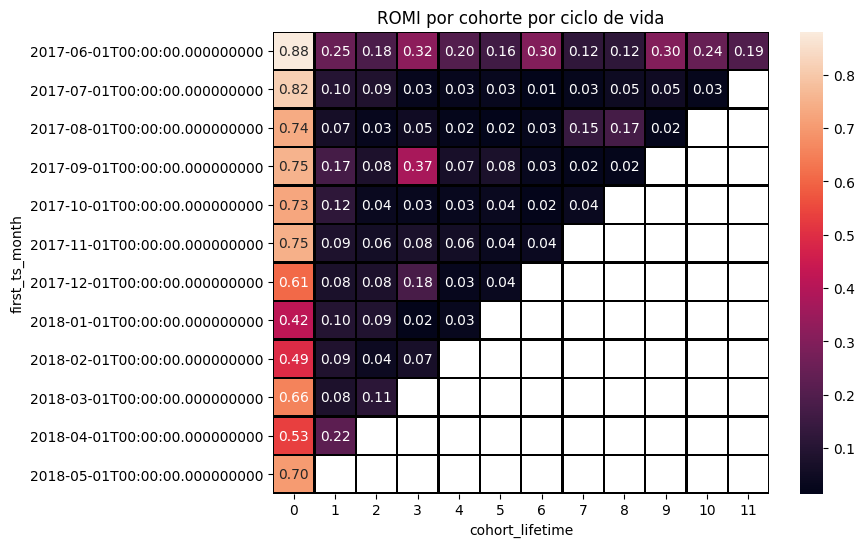

In [105]:
#¿Cuán rentables eran las inversiones? (ROMI)
#Imprimir el ROMI por cohorte por tiempo de vida
cost_per_usr_pivot = cost_per_usr.pivot_table(
    index='first_ts_month',
    columns='cohort_lifetime',
    values='romi',
    )

plt.figure(figsize=(8,6))
plt.title('ROMI por cohorte por ciclo de vida')
sns.heatmap(
    cost_per_usr_pivot,
    annot = True,
    fmt = '.2f',
    linewidths = 1,
    linecolor = 'Black')

En la tabla de arriba podemos observar  que en la mayoria d elos casos el retorno de inversion de cada cohorte supera el 50% en su primer mes de vida, el retorno de inversion tuvo una caida a partir de diciembre 2017, en 09/2017 se aumento el presupuesto de marketing $10000 y se redujo de nuevo en 04/2018, probablemente las ventas aunque tuvieron un aumento en esas fechas no fueron las esperadas para cubrir los gastos de marketing, las ventas efectivamente han tenido un aumento despues de 09/2017, solo se debe reevaluar los gastos que se estan haciendo en marketing para mantener solo los que nos estan generando el mejor retorno de inversion.

<AxesSubplot:title={'center':'ROMI por source_id por mes'}, xlabel='source_id', ylabel='visit_month'>

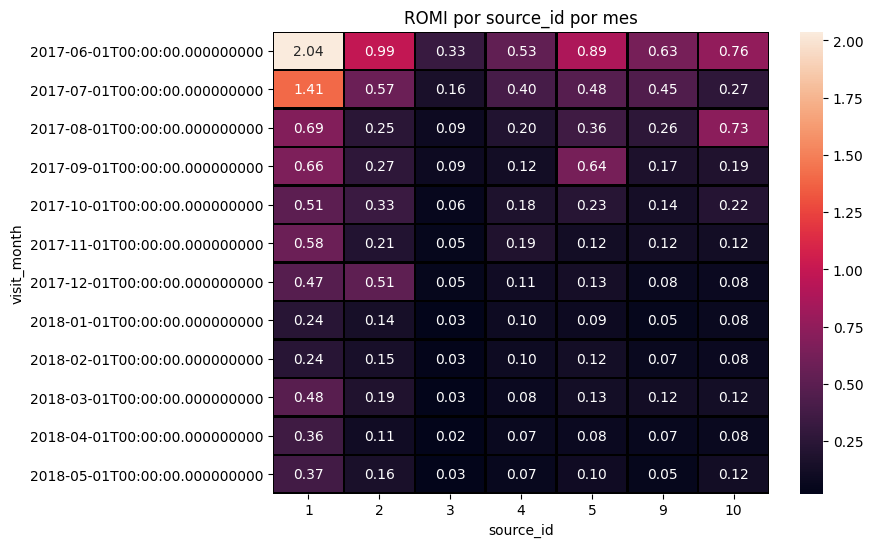

In [106]:
#¿Cuán rentables eran las inversiones? (ROMI)
cost_per_usr_pivot_2 = cost_per_usr.pivot_table(
    index='visit_month',
    columns='source_id',
    values='romi',
    )

plt.figure(figsize=(8,6))
plt.title('ROMI por source_id por mes')
sns.heatmap(
    cost_per_usr_pivot_2,
    annot = True,
    fmt = '.2f',
    linewidths = 1,
    linecolor = 'Black')

En la tabla de arriba podemos observar que que las primeras 2 fuentes fueron muy buenas de inicio cuando habia pocas ventas si retornaban la inversion, pero fueron disminuyendo su rendimiento con el tiempo a pesar de que ahora hay mas ventas,aun asi son las que mejor rendimiento estan dando hasta los ultimos meses.
La fuente 3 solamente el primer mes retorno el 30% y despues de eso no ha logrado generar buenos rendimientos a pesar de ser por la que mas se paga, las fuentes 4 y 9 estan en la misma situacion que la 3.
La fuente 5 y 10 son regulares, tuvieron buen desempeño los primeros meses y despues se mantienen retornando por debajo del 15% cada mes, la diferencia entre estas es que la fuente 10 es muy barata, no representa un gasto muy fuerte, y la 5 si es mas costosa.

In [107]:
print(cost_per_usr.groupby('source_id').agg({'buyer?':'sum', 'revenue_sum':'sum','costs':'sum'}))

           buyer?  revenue_sum      costs
source_id                                
1            7771     63165.14  143247.32
2            7016     69169.15  292631.43
3            9633     42124.75  968277.82
4           10894     48314.91  415948.36
5            9545     57089.68  354919.00
9            1089      3802.81   37649.67
10           1386      4367.69   39621.52


In [108]:
#¿Cuán rentables eran las inversiones? (ROMI)
print(cost_per_usr.groupby('source_id')['romi'].mean())

source_id
1     0.463398
2     0.231207
3     0.045952
4     0.119104
5     0.173448
9     0.109361
10    0.142041
Name: romi, dtype: float64


## CONCLUSION

En este arcihivo se estudio el flujo de clientes y pedidos de una pagina, asi como el desempeño de las fuentes de marketing para evaluar si se continua como se esta actualmente o se toman decisiones diferentes despues del analisis de datos.

Los datos a resaltar en este analisis son:

    -Se tienen un promedio de 908 clientes diarios, 5716 clientes semanales y 23228 clientes mensuales
    -De esos clientes mensuales solo un 15% realizan sus compras el primer mes de registro en la pagina despues menos del 2% compra cada mes.
    -La duracion promedio de los usuarios en la pagina es de 10.7 minutos.
    -El porcentaje de retencion semanal es de 16% y el mensual es de 4%.
    -El mes con menos ingresos fue el 06/2017 con 11838.34 y el de mayores ingresos fue 12/2017 con 43158.25
    -El mes con menos pedidos fue el 07/2017 con 1929 y el de mayor cantidad de pedidos fue 12/2017 con 6682
    -Se tuvo un aumento en las ventas a partir de 09/2017 pasando de 10000 promedio a 20000+ y fue mantenido hasta 05/2018
    -El ltv promedio por usuario es de 4.88 con un minimo de 3.9 y un maximo de 65.
    -Se invirtio un total de 329131.62 en marketing.
    -Se tienen 7 fuentes de marketing, identificadas por numeros, la 3, 4 y 5 son las mas costosas con un CAC desde los 600 a los 200 promedio.
    -La mayoria de las cohortes superan el 50% de romi en el primer mes de vida, desde que aumento el gasto de marketing diminuyo el romi del primer mes de vida siendo que el gasto es mayor que las compras d elos clientes.
    
   -